# Supervised Learning Algorithms Safari


#### Classification Algorithms

classification in ML is a predictive modeling technique where a class label 
is predicted for specific data samples. 

Self driving cars, email filters and reccomendation systems like netflix are examples
of the application of classification algorithms use.
We introduce six classification algorithms here; two linear machine learning algorithms 
and four nonlinear machine learning algorithms

Linear machine learning algorithms:
 Logistic Regression.
 Linear Discriminant Analysis.

Nonlinear machine learning algorithms:
 k-Nearest Neighbors (KNN).
 Naive Bayes.
 Classification and Regression Trees (CART).
 Support Vector Machines (SVM).

#### Logistic Regression

Logistic regression uses an equation as the representation, 
very much like linear regression.

Input values (x) are combined linearly using weights or coefficient values 
(referred to as the Greek capital letter Beta) to predict an output value (y). 
A key difference from linear regression is that the output value being modeled are 
binary values (0 or 1) rather than a numeric value.

Logistic regression models binary classification problems and assumes a 
Gaussian distribution for the numeric input variables.

Use the LogisticRegression class to construct a logistic regression model 

In [9]:
import pandas as pd

filename = 'c:/datasets/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
dataframe 

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [57]:
# Logistic Regression Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression


filename = 'c:/datasets/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values # Converting input data to arrays
X = array[:,0:8] # Algorithms ONLY accept Arrays
Y = array[:,8]


num_folds = 10
kfold = KFold(n_splits=num_folds)#, shuffle = True, random_state=7)
model = LogisticRegression(max_iter = 500)

results = cross_val_score(model, X, Y, cv=kfold) # epochs
#print()
#print(results)
#print(results.mean())

#clf = make_pipeline(MinMaxScaler(), LogisticRegression())
#Using Confusion Matrix

score = np.mean(results)
print(results)




[0.68831169 0.81818182 0.76623377 0.68831169 0.77922078 0.79220779
 0.84415584 0.83116883 0.75       0.80263158]


In [48]:
y_pred = cross_val_predict(model, X, Y, cv=3)
conf_mat = confusion_matrix(Y, y_pred)
print(conf_mat)
#print(y_pred)

[[437  63]
 [114 154]]


In [21]:
print(results)

print(score)

[0.78645833 0.75      ]
0.7682291666666667


In [14]:
print(results)

print(score)

[0.83116883 0.74025974 0.74025974 0.80519481 0.79220779 0.77922078
 0.66233766 0.80519481 0.82894737 0.73684211]
0.7721633629528366


In [ ]:
Initial result is refered to as the model's base line accuracy

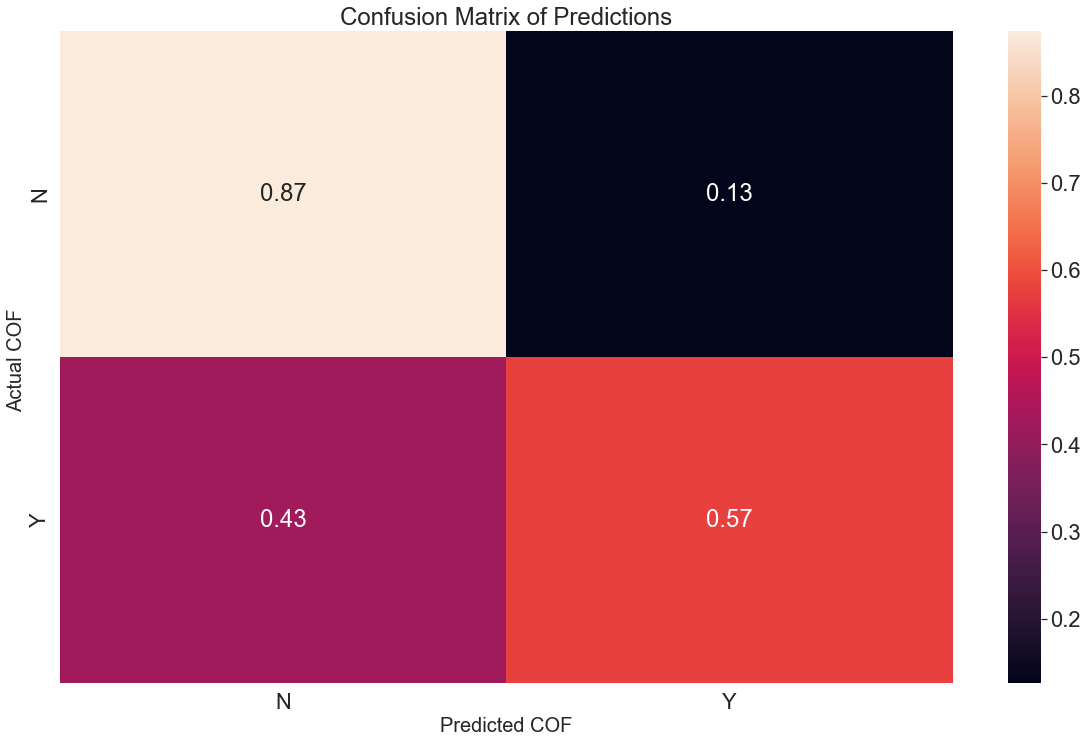

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
cm = conf_mat
#cm = confusion_matrix(y_test, y_pred)
# Normalise
labls =['N','Y']
sns.set(font_scale = 2)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labls, yticklabels=labls)
plt.ylabel('Actual COF ', size = 20)
plt.xlabel('Predicted COF', size = 20)
plt.title('Confusion Matrix of Predictions', size = 24)
#plt.figure(figsize = (16,5))
plt.show(block=False)

In [44]:
dC = dataframe[dataframe['class'] == 0]

In [45]:
dC

,preg,plas,pres,skin,test,mass,pedi,age,class
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [ ]:
Class Imbalance

In [30]:
len(dC)

0

<AxesSubplot:>

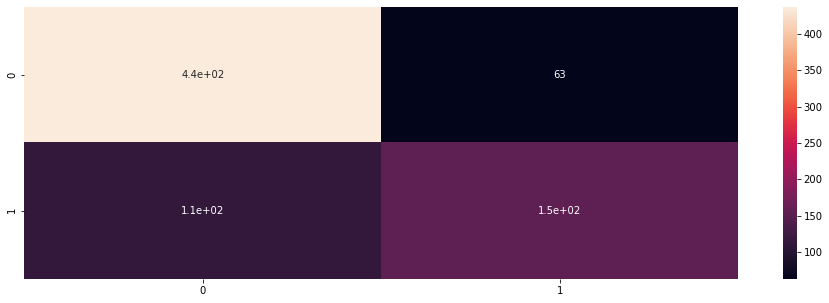

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns
cm = conf_mat
plt.figure(figsize = (16,5))
sns.heatmap(cm, annot=True)

#### Linear Discriminant Analysis

In [ ]:
Some constraints imposed by LDA

1. No multicolinearity among features
2. Gaussian distribution of each feature
3. Random sampling in feature
4. Identical variance in each feature


In [4]:
# LDA Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
filename = 'e:/datasets/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10,shuffle = True, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7669685577580315


#### Nonlinear Machine Learning 

We introduce 4 nonlinear machine learning algorithms

#### k-Nearest Neighbors

The k-Nearest Neighbors algorithm (or KNN) uses a distance metric to find the k most similar
instances in the training data for a new instance and takes the mean outcome of the neighbors
as the prediction. You can construct a KNN model using the KNeighborsClassifier

In [ ]:
KNN classifies each sample based on the similarity of its  measure compared to earlier stored sample. 

K in KNN represents the number of clusters into which the total sample is resolved

Use KNN when;

1. data is clearly labeled (0/1) (no missing data)erly labeled data. 
2. Data is noise-free (no outliers). 
c. Dataset is small.


KNN works by using the euclidean distance to calculate the nearest neighbor. 
If we have two points (xi, yi) and (xii, yii). 
The formula for Euclidean distance will be
distance = sqrt((x-xii)²+(y-yii)²)


In [6]:
# KNN Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
filename = 'c:/dataset/master/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7265550239234451


C:\Users\stanl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


#### Naive Bayes

In [7]:
# Gaussian Naive Bayes Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
filename = 'c:/dataset/master/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7551777170198223


C:\Users\stanl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


#### Classification and Regression Trees

In [8]:
# CART Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
filename = 'c:/dataset/master/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6887047163362953


C:\Users\stanl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


#### Support Vector Machines

In [7]:
# SVM Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
filename = 'c:/dataset/master/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7604237867395763


C:\Users\stanl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


#### Spot-Check Regression Algorithms

#### Spot-Check Regression Algorithms

Spot-checking is a way of discovering which algorithms perform well on your machine learning
problem. You cannot know which algorithms are best suited to your problem beforehand. You
must try out a number of methods and focus attention on those that prove themselves the most
promising. 

We introduce 7 machine learning algorithms that you can use
when spot-checking your regression problem in Python with scikit-learn. 

What we covere here:
1. How to spot-check machine learning algorithms on a regression problem.
2. How to spot-check four linear regression algorithms.
3. How to spot-check three nonlinear regression algorithms.

Algorithms Overview
In this lesson we are going to take a look at seven regression algorithms that you can spot-check
on your dataset. 

Starting with four linear machine learning algorithms:
    
. Linear Regression.
. Ridge Regression.
. LASSO Linear Regression.
. Elastic Net Regression.

Then looking at three nonlinear machine learning algorithms:
. k-Nearest Neighbors.
. Classication and Regression Trees.
. Support Vector Machines.

We use the Boston House Price dataset. 

These are regression problems where all attributes are numeric. 

A test harness with 10-fold cross validation is used to show how to spot-check 
each machine learning algorithm 

Mean squared error measures are used to indicate algorithm performance. 

Mean squared error values are inverted (negative). 
  

### Linear Machine Learning AlgorithmssmsuestId

#### Linear Regression

In [9]:
# Linear Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'c:/dataset/master/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=False, names = names)
array = dataframe.values
dataframe.dropna()
print(dataframe)
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

C:\Users\stanl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


#### Ridge Regression

Ridge regression is an extension of linear regression 
The difference is the loss function is modified to minimize the
complexity of the model measured as the sum squared value of the coefficient
values (also called the L2-norm). 

You can construct a ridge regression model by using the Ridge class

In [15]:
# Ridge Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
filename = 'c:/dataset/master/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=False, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.07824620925929


C:\Users\stanl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


#### LASSO Regression

The Least Absolute Shrinkage and Selection Operator ( LASSO ) is a modification
of linear regression, like ridge regression, where the loss function is modified to minimize the
complexity of the model measured as the sum absolute value of the coeficient values (also called
the L1-norm). 
L1 and L2 are two loss functions in machine learning which are used to minimize the error. 
L1 Loss function stands for Least Absolute Deviations.
L2 Loss function stands for Least Square Errors

L1 functions by trying to shrink coefficients to zero whereas L2 tends to shrink coefficients evenly. 
L1 is therefore useful for feature selection, we generally drop any variables associated with 
coefficients that go to zero. 

L2,  is useful when you have collinear and codependent features.

You can construct a LASSO model by using the Lasso class

In [10]:
# Lasso Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
filename = 'C:/dataset/master/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=False, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = Lasso()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.46408458830232


C:\Users\stanl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


#### ElasticNet Regression

ElasticNet is a form of regularization regression that combines the properties of both Ridge
Regression and LASSO regression. 

It seeks to minimize the complexity of the regression model (magnitude and number of regression coeficients) 
by penalizing the model using both the L2-norm (sum squared coeficient values) and the L1-norm 
(sum absolute coeficient values).

You can construct an ElasticNet model using the ElasticNet class

In [11]:
# ElasticNet Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
filename = 'c:/dataset/master/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=False, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = ElasticNet()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-31.164573714249762


C:\Users\stanl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


### Nonlinear Machine Learning Algorithms

### K-Nearest Neighbors


The k-Nearest Neighbors algorithm (or KNN) locates the k most similar instances in the
training dataset for a new data instance. 

From the k neighbors, a mean or median output variable is taken as the prediction. 

Of note is the distance metric used (the metric argument).

The Minkowski distance is used by default, which is a generalization of both the Euclidean
distance (used when all inputs have the same scale) and Manhattan distance (for when the
scales of the input variables differ). 

You can construct a KNN model for regression using the KNeighborsRegressor class

In [12]:
# KNN Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
filename = 'c:/dataset/master/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=False, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-107.28683898039215


C:\Users\stanl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


#### Classification and Regression Trees

Decision trees or the Classification and Regression Trees (CART ) use the training data to 
select the best points to split the data in order to minimize a cost metric. 

The default cost metric for regression decision trees is the mean squared error, specified in the criterion
parameter. 
You can create a CART model for regression using the DecisionTreeRegressor class

In [13]:
# Decision Tree Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
filename = 'c:/dataset/master/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=False, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-37.115830196078434


C:\Users\stanl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


#### Support Vector Machines

Support Vector Machines (SVM) were developed for binary classification. The technique has
been extended for prediction in real-valued problems called Support Vector Regression (SVR).

Like the classification example, SVR is built upon the LIBSVM library. 
You can create an SVM model for regression using the SVR class

In [33]:
# SVM Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
filename = 'c:/dataset/master/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=False, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = SVR()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

C:\Users\stanl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


-72.25543311855311
